In [77]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
######### mediapipe Holistic model ########### 

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
######## Loading Photos ######## 
Dataset_Orign = 'data'  
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Iterate through all folders in the Dataset_Orign
    for folder in os.listdir(Dataset_Orign):
        # Get the full path of the folder
        folder_path = os.path.join(Dataset_Orign, folder)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Iterate through all photos in the directory
            for Photo in os.listdir(folder_path):
                # Get the full path of the photo_file
                photo_path = os.path.join(folder_path, Photo)

                # Check if it's a file
                if os.path.isfile(photo_path):
                    # Read feed
                    frame = cv2.imread(photo_path)

                    # Check if the frame was successfully read
                    if frame is not None:
                        # Make detections
                        img, results = mediapipe_detection(frame, holistic)
                        print(results)

                        # Draw landmarks
                        draw_landmarks(img, results)

                        # Wait for a key press
                        cv2.waitKey(0)

    # Close all windows
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.pose_landmarks.landmark)

33

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

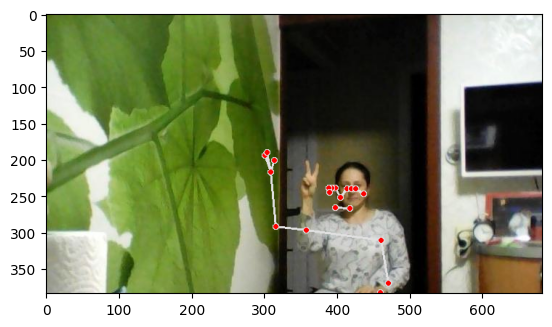

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
###### Extracting Keypoints #####

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 5.93073606e-01,  6.57941520e-01, -2.01747105e-01,  9.42144334e-01,
        6.06428266e-01,  6.25769258e-01, -1.83027148e-01,  9.37995732e-01,
        6.15513444e-01,  6.26724958e-01, -1.83199078e-01,  9.39380705e-01,
        6.23831034e-01,  6.27392530e-01, -1.83510512e-01,  9.41229105e-01,
        5.83022833e-01,  6.22967005e-01, -1.72463596e-01,  9.34620559e-01,
        5.76306343e-01,  6.22837603e-01, -1.72330886e-01,  9.32878971e-01,
        5.69917798e-01,  6.22758627e-01, -1.72622472e-01,  9.33564246e-01,
        6.40652776e-01,  6.44302428e-01, -6.35281131e-02,  9.36199307e-01,
        5.72356224e-01,  6.40219331e-01, -2.09461711e-02,  9.32138681e-01,
        6.12315297e-01,  6.97286546e-01, -1.56183541e-01,  9.19233978e-01,
        5.83317578e-01,  6.93256855e-01, -1.46630704e-01,  9.13851976e-01,
        6.75050795e-01,  8.10037851e-01, -3.62232551e-02,  8.94193649e-01,
        5.24655461e-01,  7.75441825e-01,  7.25514740e-02,  8.79790068e-01,
        6.90254986e-01,  

In [18]:
np.save('0', result_test)
np.load('0.npy')

array([ 5.93073606e-01,  6.57941520e-01, -2.01747105e-01,  9.42144334e-01,
        6.06428266e-01,  6.25769258e-01, -1.83027148e-01,  9.37995732e-01,
        6.15513444e-01,  6.26724958e-01, -1.83199078e-01,  9.39380705e-01,
        6.23831034e-01,  6.27392530e-01, -1.83510512e-01,  9.41229105e-01,
        5.83022833e-01,  6.22967005e-01, -1.72463596e-01,  9.34620559e-01,
        5.76306343e-01,  6.22837603e-01, -1.72330886e-01,  9.32878971e-01,
        5.69917798e-01,  6.22758627e-01, -1.72622472e-01,  9.33564246e-01,
        6.40652776e-01,  6.44302428e-01, -6.35281131e-02,  9.36199307e-01,
        5.72356224e-01,  6.40219331e-01, -2.09461711e-02,  9.32138681e-01,
        6.12315297e-01,  6.97286546e-01, -1.56183541e-01,  9.19233978e-01,
        5.83317578e-01,  6.93256855e-01, -1.46630704e-01,  9.13851976e-01,
        6.75050795e-01,  8.10037851e-01, -3.62232551e-02,  8.94193649e-01,
        5.24655461e-01,  7.75441825e-01,  7.25514740e-02,  8.79790068e-01,
        6.90254986e-01,  

In [20]:
###### Making Folders for dataset ######

In [19]:
# Path for exported data, numpy arrays
DATASET = os.path.join('Dataset') 

# Actions that we try to detect
actions = np.array(['call', 'mute', 'peace'])

In [20]:
for action in actions: 
      try: 
          os.makedirs(os.path.join(DATASET, action))
      except:
           pass

In [23]:
####### Updating orign_data photos with npy extintion and loading it to dataset folder #######

In [21]:
mp_holistic = mp.solutions.holistic

# Update the path
Dataset_Orign = r'data'

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Create action folder if it doesn't exist
        folder = os.path.join(Dataset_Orign, action)
        os.makedirs(folder, exist_ok=True)
        
        # Loop through folders in the Dataset_Orign
        for photo in os.listdir(Dataset_Orign):
            photo_path = os.path.join(Dataset_Orign, photo)
            output = os.path.join(DATASET, photo)
            # Check if it is a directory
            if os.path.isdir(photo_path):
                count = 0
                # Loop through files in the folder
                for frame_Photo in os.listdir(photo_path):
                    frame_path = os.path.join(photo_path, frame_Photo)
                    
                    # Check if the file is an image
                    if frame_Photo.endswith(('.jpg', '.jpeg', '.png')):
                        # Read image
                        frame = cv2.imread(frame_path)
                        
                        # Ensure that the frame is not None 
                        if frame is not None:
                            # Make detections using MediaPipe Holistic
                            img, results = mediapipe_detection(frame, holistic)
                            
                            # Draw landmarks
                            draw_styled_landmarks(img, results)
                            
                            # Export keypoints
                            keypoints = extract_keypoints(results)
                            
                            # Save keypoints as .npy file in the action folder
                            npy_file = f"{count}.npy"
                            npy_file = os.path.splitext(frame_Photo)[0] + '.npy'
                            npy_path = os.path.join(output, npy_file)
                            np.save(npy_path, keypoints)
                            count+=1
                        else:
                            print(f"An error occured with reading image: {frame_path}")

print("Done")

Done


In [22]:
cv2.destroyAllWindows()

In [23]:
##### Creating Labels #####

In [24]:
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'call': 0, 'mute': 1, 'peace': 2}

In [27]:
import re
sequences, labels = [], []
for action in actions:
    for file in os.listdir(os.path.join(DATASET, action)):
        # Use regular expression to extract numeric part of the file name
        match = re.match(r'(\d+)', file)
        if match:
            sequence_number = int(match.group(1))  # Extract the numeric part
            window = []
            res = np.load(os.path.join(DATASET, action, file))
            window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

In [28]:
sequences

[[array([ 0.68639588,  0.32003394, -1.00087774,  0.94792265,  0.71734828,
          0.27928701, -0.92436904,  0.94417578,  0.74604487,  0.27795571,
         -0.92436653,  0.94542056,  0.77525616,  0.27663869, -0.92447859,
          0.94708049,  0.62906361,  0.28594753, -0.9275915 ,  0.94114602,
          0.59799379,  0.28936782, -0.92702788,  0.93958193,  0.57066864,
          0.29261377, -0.92757368,  0.94019979,  0.81878692,  0.29442725,
         -0.37742648,  0.94254154,  0.52609324,  0.3190752 , -0.37862864,
          0.93891752,  0.73429316,  0.363388  , -0.79932433,  0.92729908,
          0.62936407,  0.36707613, -0.80102628,  0.92246026,  1.03503692,
          0.48420507, -0.06701512,  0.90472358,  0.4291234 ,  0.50134128,
         -0.2371446 ,  0.8918007 ,  1.10427523,  0.74086392,  0.07055335,
          0.79124475,  0.18170804,  0.70833635, -1.03902209,  0.78064513,
          1.04813242,  0.92270601, -0.0622851 ,  0.69039404,  0.39058304,
          0.53975868, -2.20633245,  0.

In [29]:
np.array(sequences).shape

(3344, 1, 258)

In [30]:
np.array(labels).shape

(3344,)

In [31]:
X = np.array(sequences)

In [32]:
X

array([[[ 0.68639588,  0.32003394, -1.00087774, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.54138559,  0.4866187 , -0.91145974, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.60097653,  0.30378726, -0.34361878, ...,  0.58268613,
          0.35623083, -0.02302248]],

       ...,

       [[ 0.57385617,  0.50576556, -1.05150425, ...,  0.19927642,
          0.65069979, -0.02714535]],

       [[ 0.46983454,  0.51608855, -0.77457571, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.47513473,  0.31387061, -0.55629915, ...,  0.        ,
          0.        ,  0.        ]]])

In [33]:
X.shape

(3344, 1, 258)

In [34]:
Y = to_categorical(labels).astype(int)

In [35]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

In [37]:
X_train.shape

(3176, 1, 258)

In [38]:
y_test.shape

(168, 3)

In [42]:
##### Building And trainning LSTM nueral network ####

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
from keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(1, 258)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(BatchNormalization())  # Add batch normalization
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(BatchNormalization())  # Add batch normalization
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Microsoft\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
actions.shape[0]

3

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'call'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.3480 - loss: 1.4381
Epoch 2/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.4404 - loss: 1.1360
Epoch 3/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.5132 - loss: 1.0173
Epoch 4/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.5385 - loss: 0.9572
Epoch 5/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.5700 - loss: 0.9001
Epoch 6/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6087 - loss: 0.8442
Epoch 7/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.6240 - loss: 0.7945
Epoch 8/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6373 - loss: 0.7684
Epoch 9/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6477 - loss: 0.7664
Epoch 10/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6533 - los

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,449,035 (9.34 MB)

 Trainable params: 815,875 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 1,631,752 (6.22 MB)

In [52]:
##### Making Predictions #####

In [48]:
res = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step


In [49]:
actions[np.argmax(res[3])]

'mute'

In [50]:
actions[np.argmax(y_test[3])]

'mute'

In [56]:
##### Saving Weights #######

In [51]:
model.save('action.h5')

In [52]:
model.load_weights('action.h5')

In [53]:
##### Confusion Matrix and accuracy #####

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
yhat

[2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0]

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[103,   8],
        [ 19,  38]],

       [[ 81,  25],
        [ 11,  51]],

       [[109,  10],
        [ 13,  36]]], dtype=int64)

In [60]:
acc=accuracy_score(ytrue, yhat)
print("The accuracy is : ",acc)

The accuracy is :  0.7440476190476191


In [61]:
##### Testing #####

In [72]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
     output_frame = input_frame.copy()
     for num, prob in enumerate(res):
         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
     return output_frame

In [73]:
plt.figure(figsize=(18,18))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [76]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [65]:
sequence.reverse()

In [66]:
len(sequence)

30

In [67]:
sequence.append('def')

In [68]:
sequence.reverse()

In [69]:
sequence[-30:]

[array([ 6.20161831e-01,  6.35955811e-01, -1.24351907e+00,  9.99814510e-01,
         6.63931310e-01,  5.63892126e-01, -1.16752028e+00,  9.99639630e-01,
         6.88223720e-01,  5.66071391e-01, -1.16770911e+00,  9.99667287e-01,
         7.08567500e-01,  5.69584727e-01, -1.16729832e+00,  9.99522626e-01,
         5.98869920e-01,  5.63963234e-01, -1.14827895e+00,  9.99698639e-01,
         5.81012726e-01,  5.65182984e-01, -1.14784348e+00,  9.99725819e-01,
         5.66289425e-01,  5.67116022e-01, -1.14791107e+00,  9.99692857e-01,
         7.52621830e-01,  6.09154522e-01, -6.83649123e-01,  9.99527037e-01,
         5.54268062e-01,  6.10457659e-01, -5.98482430e-01,  9.99815404e-01,
         6.72811449e-01,  7.17104971e-01, -1.05850863e+00,  9.99588370e-01,
         5.89747965e-01,  7.13494062e-01, -1.03432298e+00,  9.99747217e-01,
         8.90169263e-01,  9.44248617e-01, -4.87741858e-01,  9.78717566e-01,
         4.26832497e-01,  9.54492807e-01, -2.66052753e-01,  9.85389590e-01,
         9.1

In [70]:
res[np.argmax(res)] > threshold

False

In [71]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.14044306e-04, 3.47040477e-03, 9.96415496e-01]], dtype=float32)